In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1, rho


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# %cd /work/eay/CM2.6
# ds = xr.Dataset({'u_full': u_full})
# print('done')
# ds.to_netcdf('u_1year_CM2_1deg.nc', 'w')
# %cd /work/eay/CM2.6
# ds = xr.Dataset({'v_full': v_full})
# print('done')
# ds.to_netcdf('v_1year_CM2_1deg.nc', 'w')

### For CM2.6 data:

In [39]:
%cd /net2/smg/documents/OMDT/analysis_CM2p6/grids
os = xr.open_dataset('ocean.static.nc')
fs = xr.open_dataset('ocean_grid.nc')
depth=fs['ht'][:,:]

lon=fs['geolon_t'][::10,::10]; lat=fs['geolat_t'][::10,::10]
# Coriolis is 2Omega sin(phi) where phi is the latitude of the B-grid velocity point, which should be available in hgrid
Coriolis = 2*7.29e-5*np.sin(fs['geolat_c']/360 *2*np.pi);

%cd /work/eay/
u_full = xr.open_dataset('u_1year_CM2.6.nc')['u_full']
v_full = xr.open_dataset('v_1year_CM2.6.nc')['v_full']
zl = xr.open_dataset('v_1year_CM2.6.nc')['st_ocean']
print('done')

%cd /archive/Richard.Slater/CM2.6/CM2.6_A_Control-1860_V03/history
salt = (xr.open_dataset('02020101.ocean_minibling_field_salt.nc')['salt'][::10,:,::10,::10])
temp = (xr.open_dataset('02020101.ocean_minibling_field_temp.nc')['temp'][::10,:,::10,::10])



/net2/smg/documents/OMDT/analysis_CM2p6/grids
/work2/eay
done
/arch2/rds/CM2.6/CM2.6_A_Control-1860_V03/history


In [ ]:
%%time
salt =salt.mean('time')
print('done with salt')
temp =temp.mean('time')


done with salt


In [ ]:
plt.plot(u_full.yu_ocean,linewidth=3)
plt.plot(salt.yt_ocean,':',c='r')
print(u_full.shape,salt.shape)

In [ ]:
# %cd /archive/Richard.Slater/CM2.6/CM2.6_A_Control-1860_V03/history

# test=(xr.open_dataset('02020101.ocean_minibling_field_temp.nc')['temp'])
# print(test)

## Computing N2:

In [ ]:
%%time
density_np = rho(salt,temp,0)
print('done')


In [9]:
density = xr.DataArray(density_np,dims   = ['st_ocean','yu_ocean','xu_ocean'],
                       coords={'yu_ocean':u_full.yu_ocean,
                               'xu_ocean':u_full.xu_ocean,
                               'st_ocean':u_full.st_ocean})



drhodz = density.differentiate('st_ocean')
N2 = (9.8*drhodz/1025)

In [10]:
%cd /work/eay/CM2.6
ds = xr.Dataset({'N2': N2})
print('done')
ds.to_netcdf('CM2.6_N2.nc', 'w')
print('done')

/work2/eay/CM2.6
done
done


In [17]:
N2

<xarray.DataArray 'salt' (st_ocean: 50, yu_ocean: 270, xu_ocean: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.09 -80.67 -80.24 ... 88.78 89.2 89.62
  * xu_ocean  (xu_ocean) float64 -279.9 -278.9 -277.9 -276.9 ... 77.1 78.1 79.1
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03

In [18]:
u_full

<xarray.DataArray 'u_full' (time: 73, st_ocean: 50, yu_ocean: 270, xu_ocean: 360)>
[354780000 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -278.9 -277.9 -276.9 ... 77.1 78.1 79.1
  * yu_ocean  (yu_ocean) float64 -81.09 -80.67 -80.24 ... 88.78 89.2 89.62
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time      (time) object 0201-01-03 12:00:00 ... 0201-12-29 12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  sea_water_x_velocity

In [170]:
# ds = xr.Dataset({
#     'EOF1u': xr.DataArray(
#                 data   = saved_eof1u,   # enter data here
#                 dims   = ['zl','lat','lon'],
#                 coords = {'zl': zl, 'lat': lat_coarse.values, 'lon': lon_coarse.values}),
#     'EOF1v': xr.DataArray(
#                 data   = saved_eof1v,   # enter data here
#                 dims   = ['zl','lat','lon'],
#                 coords = {'zl': zl, 'lat': lat_coarse.values, 'lon': lon_coarse.values}
#                 ),
#     'pvaru': xr.DataArray(
#                 data   = saved_pvaru,   # enter data here
#                 dims   = ['lat','lon'],
#                 coords = {'lat': lat_coarse.values, 'lon': lon_coarse.values}
#                 ),
#     'pvarv': xr.DataArray(
#                 data   = saved_pvarv,   # enter data here
#                 dims   = ['lat','lon'],
#                 coords = {'lat': lat_coarse.values, 'lon': lon_coarse.values}
#                 )
#             })
# print('done')
# %cd /work/eay/
# ds.to_netcdf('EOF_analysis_CM2.6.nc', 'w')

done
/work2/eay


In [21]:
%cd /work/eay/CM2.6
test = xr.open_dataset('CM2.6_N2.nc')
print(test)


/work2/eay/CM2.6
<xarray.Dataset>
Dimensions:   (yu_ocean: 270, xu_ocean: 360, st_ocean: 50)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.09 -80.67 -80.24 ... 88.78 89.2 89.62
  * xu_ocean  (xu_ocean) float64 -279.9 -278.9 -277.9 -276.9 ... 77.1 78.1 79.1
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
Data variables:
    N2        (st_ocean, yu_ocean, xu_ocean) float64 ...


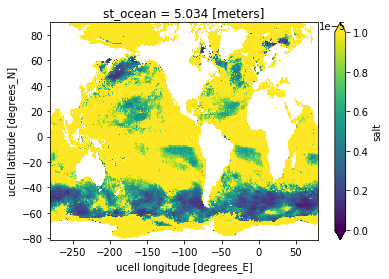

In [28]:
N2[0,:].plot(vmin=0,vmax=1e-5)

In [29]:
test

<xarray.Dataset>
Dimensions:   (yu_ocean: 270, xu_ocean: 360, st_ocean: 50)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.09 -80.67 -80.24 ... 88.78 89.2 89.62
  * xu_ocean  (xu_ocean) float64 -279.9 -278.9 -277.9 -276.9 ... 77.1 78.1 79.1
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
Data variables:
    N2        (st_ocean, yu_ocean, xu_ocean) float64 ...